In [1]:
import numpy as np
import scipy as sp
import sympy
import math
import matplotlib.pyplot as plt
from heart import *
from valve_p import *
from three_windkessel import *

In [152]:
T=3
lv=heart(0.269*T,0.452*T,1.32,27.4,3,0.08,20*10**(-9),10,T)
#tau1,tau2,m1,m2,Emax,Emin,Ks,V0,T
la=heart(0.110*T,0.180*T,1.6,13.1,3,0.08,10*10**(-9),3,T)

av=ValveinP(1.06,1,1,0.012,0.012,40,0.001)
#density, eff_length, Aann, Kvo,Kvc,p_oc,p_difference,xi
mv=ValveinP(1.06,1,1,0.03,0.04,10,0.001)

cap=PressureSystem(0.05, 0.33, 21.68)#C,Za,R

In [153]:
t_end=120
t = [0,t_end]
t_span=np.arange(0,t_end,0.05)
aeff_av_values = []
et_lv = []
p_lv_values=[]
time=[]

In [154]:
def dydt(t,y):
    v_lv = y[0]
    v_la = y[1]
    q_av = y[2]
    q_mv = y[3]
    xi_av = y[4]
    xi_mv = y[5]
    p = y[6]
    #get value from class
    p_la = la.p(v_la,t,q_mv,0.65*la.T)
    p_lv = lv.p(v_lv,t,q_av)
    q1 = cap.qout(p,p_la)
    pi = cap.pi(q_av,p)
    #derivative
    dv_lv = lv.dv(t,v_lv,q_mv,q_av)
    dv_la = la.dv(t,v_la,q1,q_mv)
    dxi_av = av.dxi(t,xi_av,p_lv,pi)
    dxi_mv = mv.dxi(t,xi_mv,p_la,p_lv)
    dq_av = av.dq(t,q_av,xi_av,p_lv,pi)
    dq_mv = mv.dq(t,q_mv,xi_mv,p_la,p_lv)#time,q,xi,pin,pout
    dp = cap.dp(t,p,q_av,p_la)
    #derivative vector
    dy = np.array([dv_lv, dv_la, dq_av, dq_mv, dxi_av, dxi_mv, dp])
    return dy

#initial condition
y_initial = np.array([400, 50, 150, 10, 0.01, 0.5, 5])

#integration
sol = sp.integrate.solve_ivp(dydt , t , y0 = y_initial , t_eval = t_span, method='LSODA')

In [155]:
aeff_av = []
et_lv = []
B_av = []
p_lv_values = []
p_la_values = []
pi = []
dp_av = []
L_av = []
dq_mv = []
dxi_mv = []
L_mv = []
B_mv = []
aeff_mv = []
dp_mv = []
dxi_av = []
et_la = []
for i,j in zip(sol.t,range(len(sol.y[4]))):
    aeff_av.append(av.Aeff(i, sol.y[4][j]))
    et_lv.append(lv.Et(i))
    et_la.append(la.Et(i,0.65*T))
    B_av.append(av.B(i, sol.y[4][j]))
    L_av.append(av.L(i, sol.y[4][j]))
    p_lv_values.append(lv.p(sol.y[0][j], i, sol.y[2][j]))
    p_la_values.append(la.p(sol.y[1][j], i, sol.y[3][j], 0.65*la.T))
    pi.append(cap.pi(sol.y[2][j],sol.y[6][j]))
    dp_av.append(p_lv_values[-1]-pi[-1])
    dq_mv.append(mv.dq(i,sol.y[3][j],sol.y[5][j],p_la_values[-1],p_lv_values[-1]))#time,q,xi,pin,pout
    dxi_mv.append(mv.dxi(i,sol.y[5][j],p_la_values[-1],p_lv_values[-1]))
    L_mv.append(mv.L(i, sol.y[5][j]))
    B_mv.append(mv.L(i, sol.y[5][j]))
    aeff_mv.append(mv.Aeff(i, sol.y[5][j]))
    dp_mv.append(p_la_values[-1]-p_lv_values[-1])
    dxi_av.append(av.dxi(i,sol.y[4][j],p_lv_values[j], cap.pi(sol.y[2][j], sol.y[6][j])))

Text(0, 0.5, 'dxi_av')

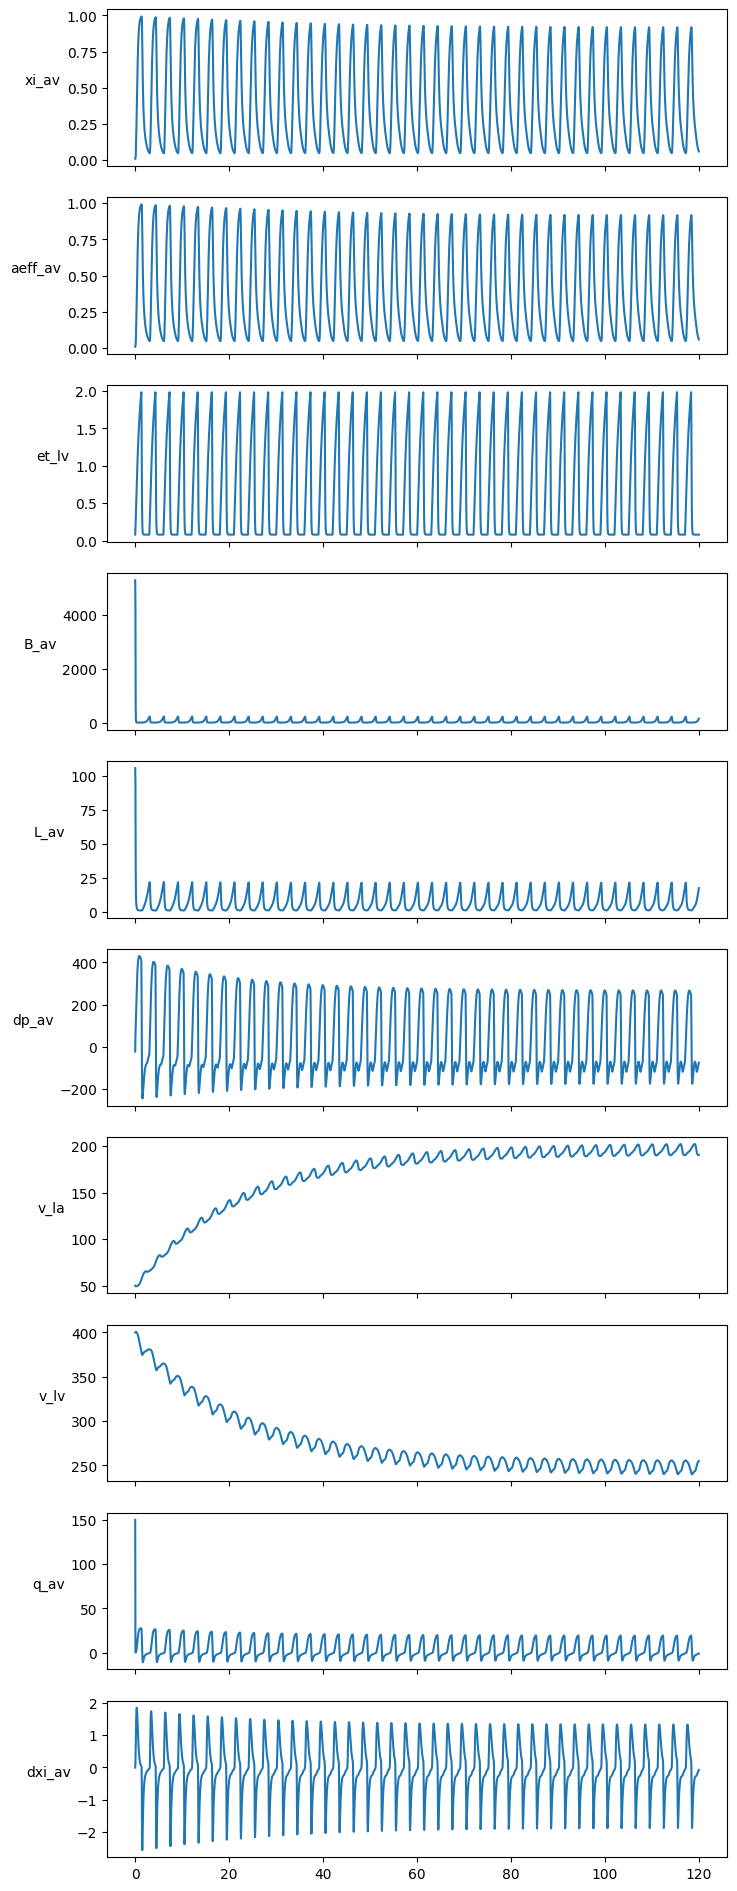

In [156]:
fig,axs = plt.subplots(10,1,sharex=True, figsize=(8, 24))
axs[0].plot(sol.t,sol.y[4])
axs[0].set_ylabel('xi_av',rotation=0, ha='right')

axs[1].plot(sol.t, aeff_av)
axs[1].set_ylabel('aeff_av',rotation=0, ha='right')

axs[2].plot(sol.t, et_lv)
axs[2].set_ylabel('et_lv',rotation=0, ha='right')

axs[3].plot(sol.t, B_av)
axs[3].set_ylabel('B_av',rotation=0, ha='right')

axs[4].plot(sol.t, L_av)
axs[4].set_ylabel('L_av',rotation=0, ha='right')


axs[5].plot(sol.t, dp_av)
axs[5].set_ylabel('dp_av',rotation=0, ha='right')

axs[6].plot(sol.t,sol.y[1])
axs[6].set_ylabel('v_la',rotation=0, ha='right')

axs[7].plot(sol.t,sol.y[0])
axs[7].set_ylabel('v_lv',rotation=0, ha='right')

axs[8].plot(sol.t,sol.y[2])
axs[8].set_ylabel('q_av',rotation=0, ha='right')

axs[9].plot(sol.t,dxi_av)
axs[9].set_ylabel('dxi_av',rotation=0, ha='right')

Text(0, 0.5, 'dp_mv')

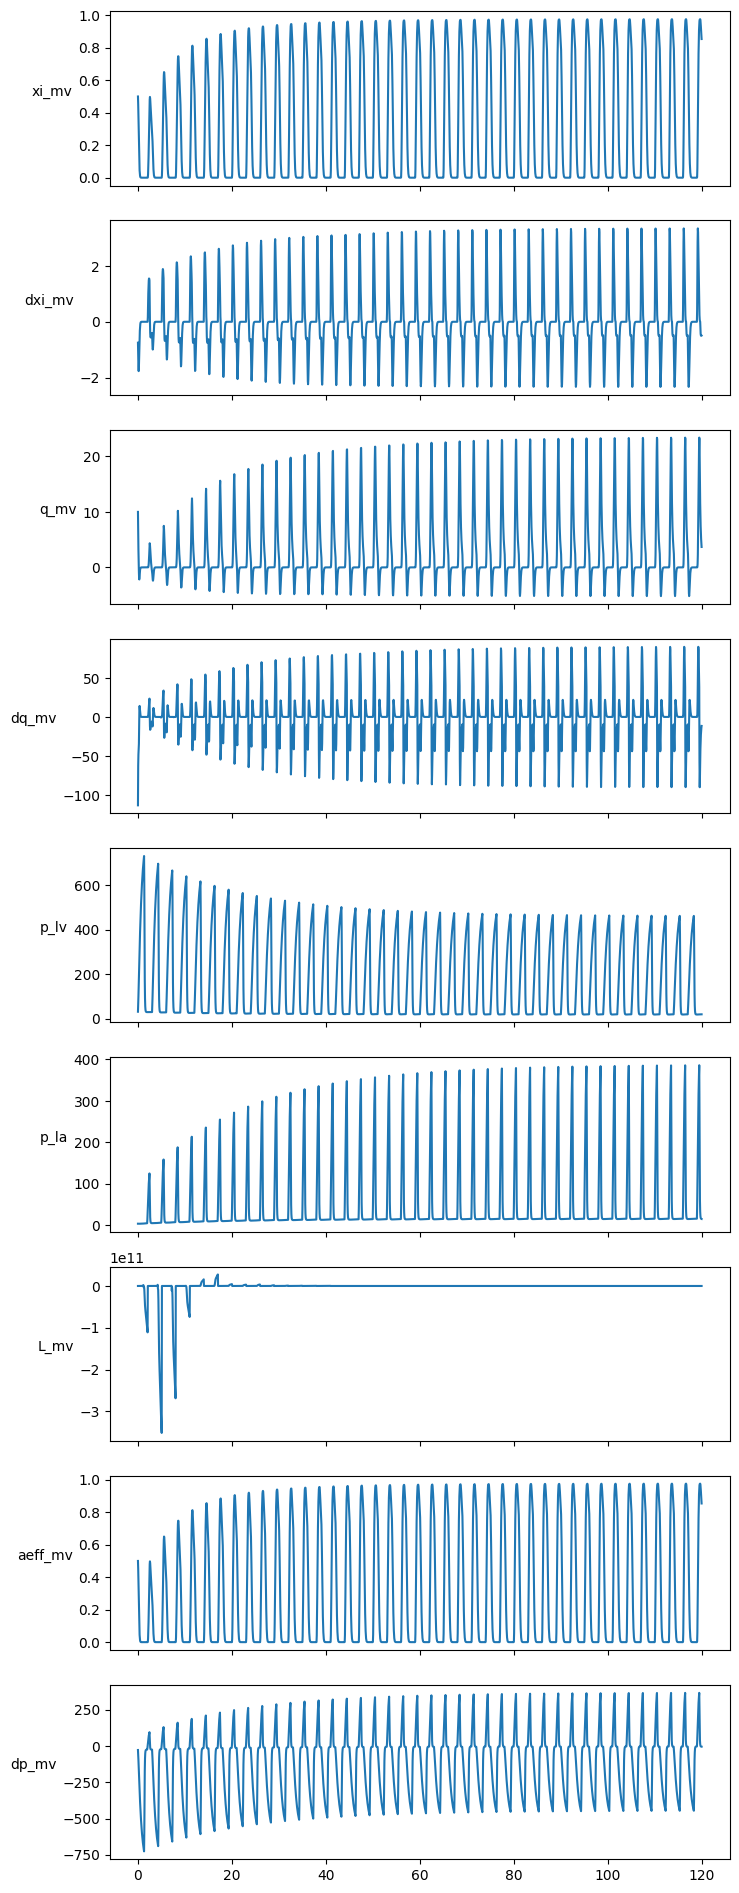

In [157]:
fig,axs = plt.subplots(9,1,sharex=True, figsize=(8, 24))
axs[0].plot(sol.t,sol.y[5])
axs[0].set_ylabel('xi_mv',rotation=0, ha='right')

axs[1].plot(sol.t, dxi_mv)
axs[1].set_ylabel('dxi_mv',rotation=0, ha='right')

axs[2].plot(sol.t,sol.y[3])
axs[2].set_ylabel('q_mv',rotation=0, ha='right')

axs[3].plot(sol.t,dq_mv)
axs[3].set_ylabel('dq_mv',rotation=0, ha='right')


axs[4].plot(sol.t, p_lv_values)
axs[4].set_ylabel('p_lv',rotation=0, ha='right')

axs[5].plot(sol.t, p_la_values)
axs[5].set_ylabel('p_la',rotation=0, ha='right')

axs[6].plot(sol.t, L_mv)
axs[6].set_ylabel('L_mv',rotation=0, ha='right')

axs[7].plot(sol.t, aeff_mv)
axs[7].set_ylabel('aeff_mv',rotation=0, ha='right')

axs[8].plot(sol.t, dp_mv)
axs[8].set_ylabel('dp_mv',rotation=0, ha='right')

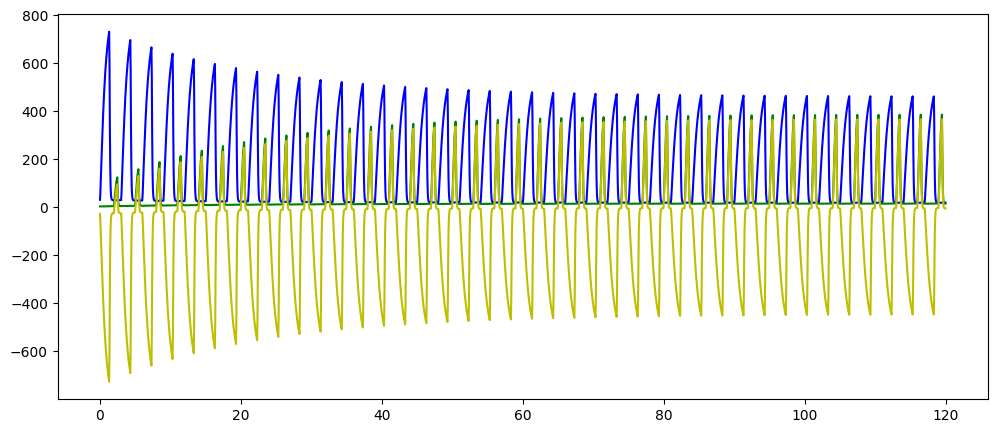

In [158]:
plt.figure(figsize=(12, 5))
plt.plot(sol.t, p_lv_values,'b')
plt.plot(sol.t, p_la_values,'g')
plt.plot(sol.t, dp_mv,'y')
#plt.xlim(0,2)
#plt.ylim(-1e4,1e3)
plt.show()

Text(0, 0.5, 'xi_mv')

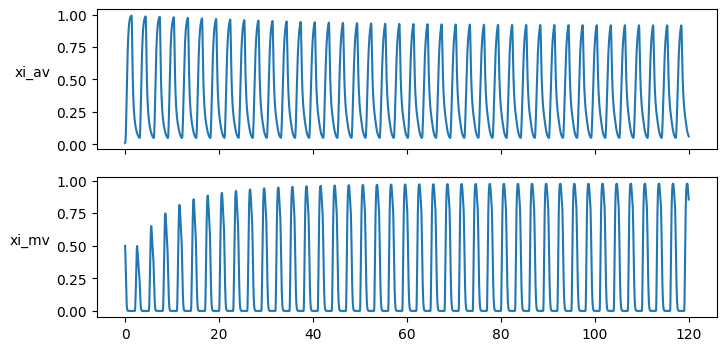

In [159]:
fig,axs = plt.subplots(2,1,sharex=True, figsize=(8, 4))
axs[0].plot(sol.t,sol.y[4])
axs[0].set_ylabel('xi_av',rotation=0, ha='right')

axs[1].plot(sol.t,sol.y[5])
axs[1].set_ylabel('xi_mv',rotation=0, ha='right')


In [162]:
xi_av = sol.y[4]
print(max(xi_av))

0.9924972765781673
